In [10]:
import numpy as np
import pandas as pd

In [12]:
df=pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [14]:
df.shape

(10000, 14)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
df.duplicated().sum()

0

In [20]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [22]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [24]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [26]:
df.drop(columns=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)


In [28]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [30]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [32]:
##
X=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [33]:
X_test.shape

(2000, 11)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [70]:
!pip install tensorflow

   ---------------------------------------- 0.0/376.0 MB ? eta -:--:--
   ---------------------------------------- 1.8/376.0 MB 10.1 MB/s eta 0:00:38
   ---------------------------------------- 4.2/376.0 MB 10.1 MB/s eta 0:00:37
    --------------------------------------- 6.3/376.0 MB 10.4 MB/s eta 0:00:36
    --------------------------------------- 8.7/376.0 MB 10.5 MB/s eta 0:00:35
   - -------------------------------------- 10.7/376.0 MB 10.7 MB/s eta 0:00:35
   - -------------------------------------- 12.8/376.0 MB 10.5 MB/s eta 0:00:35
   - -------------------------------------- 15.2/376.0 MB 10.6 MB/s eta 0:00:34
   - -------------------------------------- 17.0/376.0 MB 10.4 MB/s eta 0:00:35
   -- ------------------------------------- 19.4/376.0 MB 10.5 MB/s eta 0:00:35
   -- ------------------------------------- 21.8/376.0 MB 10.6 MB/s eta 0:00:34
   -- ------------------------------------- 24.1/376.0 MB 10.6 MB/s eta 0:00:34
   -- ------------------------------------- 26.5/376.

In [62]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [54]:
model=Sequential()
###input layer with batch normalization
model.add(Dense(11,activation='relu',input_dim=11,kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())

###hiddenlayer with l2 regularization and dropout
model.add(Dense(11,activation='relu',kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))##dropout to prevent overfitting

##output layer
model.add(Dense(1,activation='sigmoid'))

E:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 11)                  │              44 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 298 (1.16 KB)

 Non-trainable params: 22 (88.00 B)

In [58]:
opt=Adam(learning_rate=0.0005)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['Accuracy'])



In [64]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history=model.fit(X_train_trf,y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - Accuracy: 0.4312 - loss: 0.9321 - val_Accuracy: 0.7188 - val_loss: 0.6437
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Accuracy: 0.6830 - loss: 0.6510 - val_Accuracy: 0.7994 - val_loss: 0.5234
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.7677 - loss: 0.5547 - val_Accuracy: 0.8150 - val_loss: 0.4756
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Accuracy: 0.7890 - loss: 0.5160 - val_Accuracy: 0.8138 - val_loss: 0.4568
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.8016 - loss: 0.4809 - val_Accuracy: 0.8188 - val_loss: 0.4475
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.7960 - loss: 0.4805 - val_Accuracy: 0.8225 - val_loss: 0.4405
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Accuracy: 0.7994 - loss: 0.4706 - val_Accuracy: 0.8269 - val_loss: 0.4352
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Accuracy: 0.8189 - loss: 0.4549 - val_Accu

In [66]:
model.layers[0].get_weights()


[array([[-5.07672019e-02, -9.72142071e-02, -1.04308571e-03,
         -9.24585909e-02,  2.05459297e-02, -5.75253256e-02,
         -1.42537029e-02, -4.22377624e-02,  1.71750840e-02,
          4.39972151e-04,  6.28321469e-02],
        [ 1.98976070e-01, -5.85508980e-02,  1.90271631e-01,
          2.19548158e-02,  7.24845901e-02,  4.33470935e-01,
          1.35349944e-01,  3.56958583e-02, -4.51427817e-01,
          3.94169420e-01, -2.56725073e-01],
        [-4.67786491e-02,  3.42192943e-03, -1.15720481e-01,
          4.58658822e-02, -4.07049768e-02,  6.72095455e-03,
         -2.05392867e-01, -1.34677842e-01,  2.02264208e-02,
          2.98477933e-02, -7.17345718e-03],
        [ 1.89854234e-01, -1.21231236e-01,  9.99815613e-02,
         -1.07953057e-01,  4.05939102e-01,  9.07620415e-02,
         -4.00565155e-02,  1.31615251e-01,  1.07035032e-02,
         -2.48391151e-01, -1.41397044e-01],
        [ 1.87393352e-01, -3.32282215e-01, -5.34290597e-02,
          2.31867939e-01,  4.10764962e-01,  

In [68]:
y_log=model.predict(X_test_trf)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [70]:
y_pred=np.where(y_log>0.5,1,0)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.867

In [78]:
import matplotlib.pyplot as plt

TypeError: 'dict' object is not callable

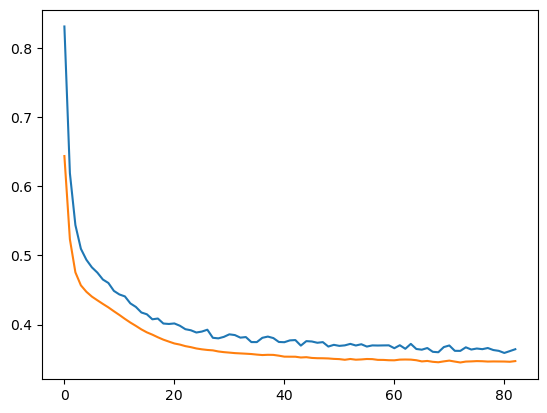

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

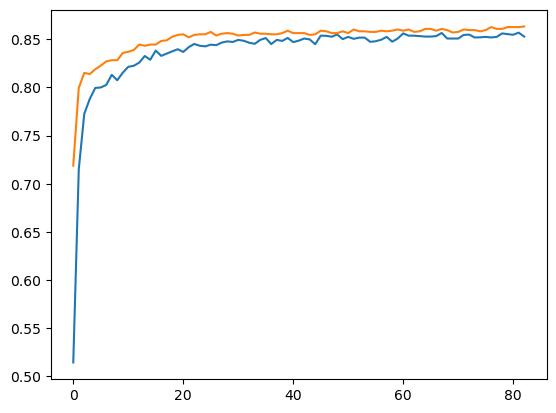

In [82]:
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])

In [88]:
train_acc = model.evaluate(X_train_trf, y_train)[1]
#val_acc = model.evaluate(X_val_trf, y_val)[1]  # If you have a validation set
test_acc = model.evaluate(X_test_trf, y_test)[1]  # Final test set accuracy

print(f"Train Accuracy: {train_acc:.2f}")
#print(f"Validation Accuracy: {val_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")


250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - Accuracy: 0.8702 - loss: 0.3337
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - Accuracy: 0.8705 - loss: 0.3408
Train Accuracy: 0.86
Test Accuracy: 0.87


KeyError: 'val_accuracy'

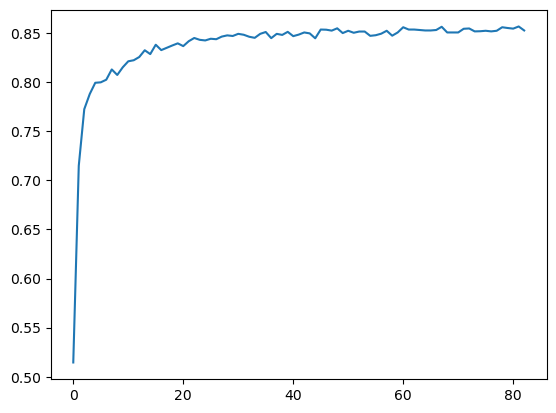

In [92]:
import matplotlib.pyplot as plt

plt.plot(history.history['Accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()


In [94]:
predictions = model.predict(X_test_trf)
predictions = (predictions > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [98]:

# Show predictions for first 10 customers
df_results = pd.DataFrame({
    'Actual Churn': y_test.values[:20],
    'Predicted Churn': predictions.flatten()[:20]
})
print(df_results)

    Actual Churn  Predicted Churn
0              0                0
1              0                0
2              0                0
3              0                0
4              0                0
5              0                0
6              0                0
7              1                0
8              0                0
9              0                0
10             1                1
11             1                1
12             1                1
13             0                0
14             0                0
15             0                0
16             0                0
17             0                0
18             0                0
19             0                0
